# Game Historical Data


#### Summary:
1. Importing Dependencies
2. Define some functions to grab data and create graphs
3. Pull CSV from source for the top games of our choosing: <br>
    a. Among Us <br>
    b. League of Legends <br>
    c. Call of Duty: Modern Warfare <br>
    d. Fortnite <br>
    e. Counter Strike: Global Offensive <br>
4. Create 4 total graphs for each games
5. Conclusions

Data Source: https://twitchtracker.com/

### 1. Importing Dependencies:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Defining Functions:

In [2]:
# Function to make sure all data is formatted the same for the months
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df

In [3]:
# Function definition to pull dataframe from twitch tracker data and merge them
def createdf(gamename):
    # Creating df for each concurrent streams, concurrent viewers, hours watched
    df_stream = pd.read_csv(f'Twitch Tracker Data/{gamename}_concurrent_streams.csv')
    df_views = pd.read_csv(f'Twitch Tracker Data/{gamename}_concurrent_viewers.csv')
    df_hours = pd.read_csv(f'Twitch Tracker Data/{gamename}_hours_watched.csv')
    
    # Clean the df_stream and df_views
    df_stream = cleandate(df_stream)
    df_views = cleandate(df_views)
    
    # Renaming the columns based on where the data is coming from
    df_stream = df_stream.rename(columns = {'Average': 'Average_Stream', 'Gain':'Gain_Stream', '% Gain': '% Gain_Stream', 'Peak':'Peak_Stream'})
    df_views = df_views.rename(columns = {'Average': 'Average_Views', 'Gain':'Gain_Views', '% Gain': '% Gain_Views', 'Peak':'Peak_Views'})
    df_hours = df_hours.rename(columns = {'Value': 'Hours_Watched', 'Gain':'Gain_Hours', '% Gain': '% Gain_Hours'})
    
    # Creating the complete dataframe for the particular game
    df_complete = df_stream.merge(df_views, on = 'Month')
    df_complete = df_complete.merge(df_hours, on = 'Month')
    
    return df_complete
      

In [4]:
# Function definition to graph the data that we obtained using the following rule:
# num values has to be between 1-4
# 1 to get the average concurrent streams graph
# 2 to get the average concurrent views graph
# 3 to get the peak streams graph
# 4 to get the peak views graph

def datagraph(df, gamename, num):
    
    # Graphing the average concurrent streams
    if num == 1:
        exec(f'fig_{gamename}_{num} , ax_{gamename}_{num} = plt.subplots(figsize=(10,5))')
        eval(f"ax_{gamename}_{num}.bar({df}['Month'],{df}['Average_Stream'], color='rebeccapurple')");
        eval(f"ax_{gamename}_{num}.set(xlabel = 'Date', ylabel = 'Average Concurrent Streams', title = '{gamename} Average Streams on Twitch')");
        plt.xticks(rotation = 'vertical')
        plt.gca().invert_xaxis()
    
    # Graphing the average concurrent views
    elif num == 2:
        exec(f'fig_{gamename}_{num} , ax_{gamename}_{num} = plt.subplots(figsize=(10,5))')
        eval(f"ax_{gamename}_{num}.bar({df}['Month'],{df}['Average_Views'], color='rebeccapurple')");
        eval(f"ax_{gamename}_{num}.set(xlabel = 'Date', ylabel = 'Average Concurrent Views', title = '{gamename} Average Views on Twitch')");
        plt.xticks(rotation = 'vertical')
        plt.gca().invert_xaxis()
    
    # Graphing the peak streams
    elif num == 3:  
        exec(f'fig_{gamename}_{num} , ax_{gamename}_{num} = plt.subplots(figsize=(10,5))')
        eval(f"ax_{gamename}_{num}.plot({df}['Month'],{df}['Peak_Stream'], color='rebeccapurple', marker = 'o')");
        eval(f"ax_{gamename}_{num}.set(xlabel = 'Date', ylabel = 'Peak Streams', title = '{gamename} Peak Streams on Twitch')");
        plt.xticks(rotation = 'vertical')
        plt.gca().invert_xaxis()      
    
    # Graphing the peak views
    elif num == 4:
        exec(f'fig_{gamename}_{num} , ax_{gamename}_{num} = plt.subplots(figsize=(10,5))')
        eval(f"ax_{gamename}_{num}.plot({df}['Month'],{df}['Peak_Views'], color='rebeccapurple', marker = 'o')");
        eval(f"ax_{gamename}_{num}.set(xlabel = 'Date', ylabel = 'Peak Views', title = '{gamename} Peak Views on Twitch')");
        plt.xticks(rotation = 'vertical')
        plt.gca().invert_xaxis()
    
    # If user put anything else other than the number specified
    else:
        print("Use the number listed please!!!")
        

### 3. Pull CSV Files for each games:

In [5]:
# Among Us
df_amongus = createdf("amongus")

# League of Legends
df_lol = createdf("lol")

# Call of Duty: Modern Warfare
df_cod = createdf(gamename = "cod")

# Fortnite
df_fortnite = createdf("fortnite")

# Counter Strike: Global Offensive
df_csgo = createdf("csgo")


### 4. Create Graph for each game:

In [6]:
# Setting up to make the function calls simpler

numlist = [1,2,3,4]

#### Among Us:

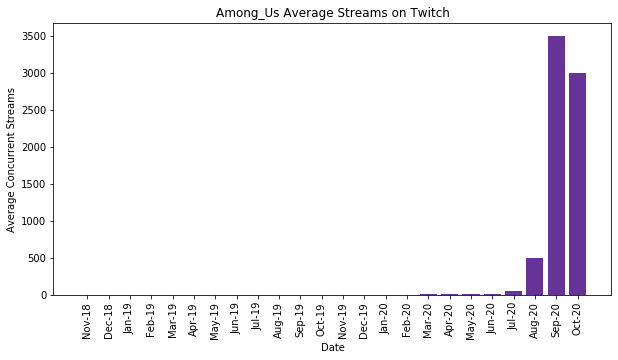

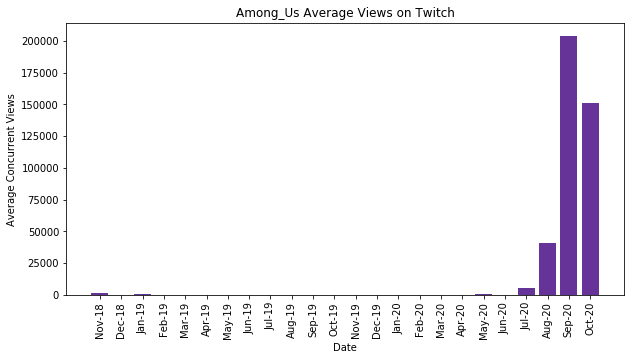

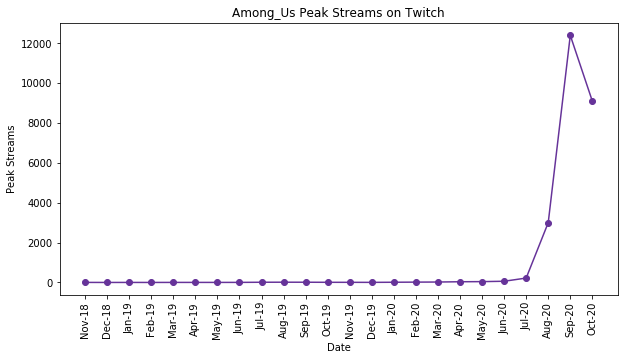

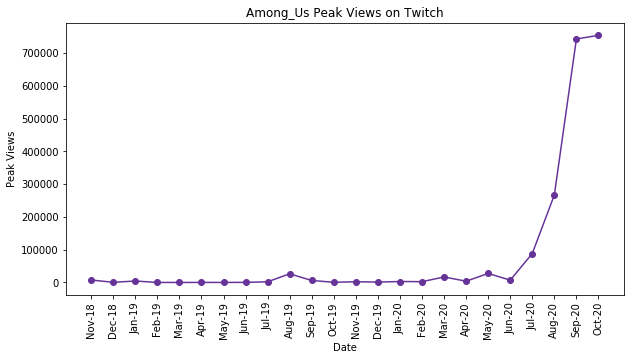

In [7]:
for num in numlist:
    datagraph('df_amongus', 'Among_Us', num)

#### League of Legends:

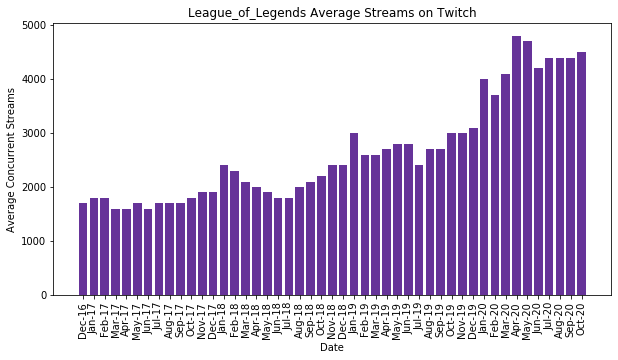

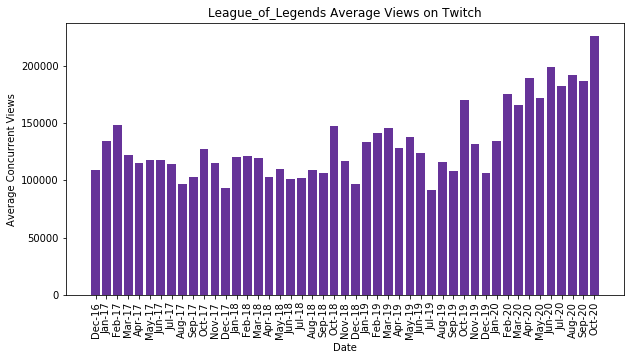

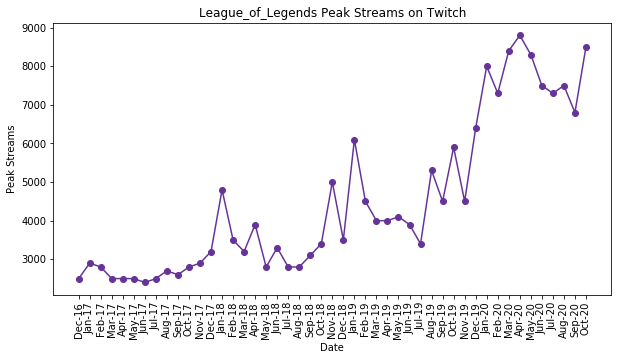

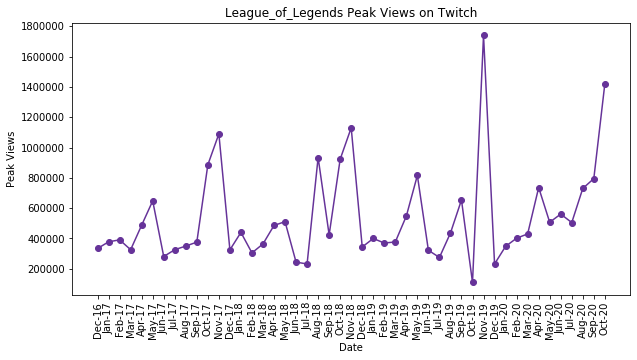

In [8]:
for num in numlist:
    datagraph('df_lol', 'League_of_Legends', num)

#### Call of Duty: Modern Warfare:

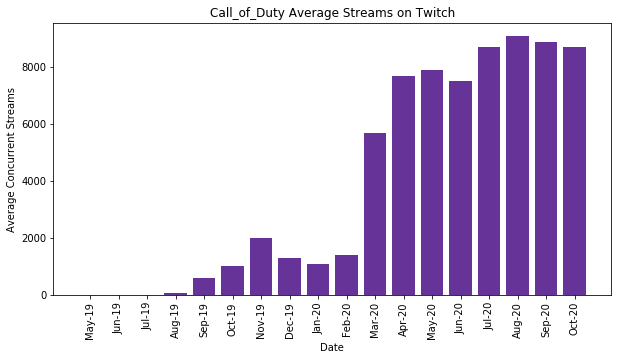

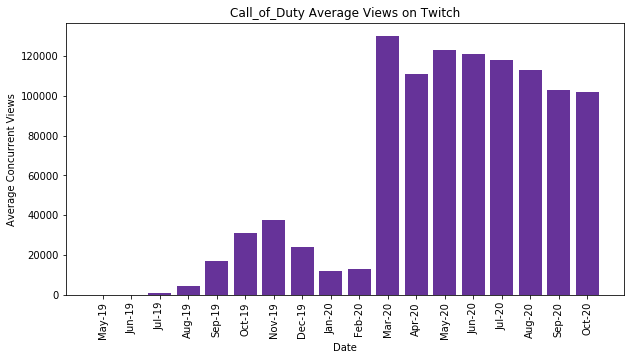

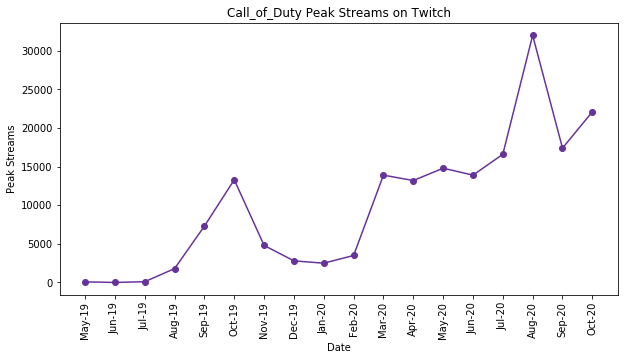

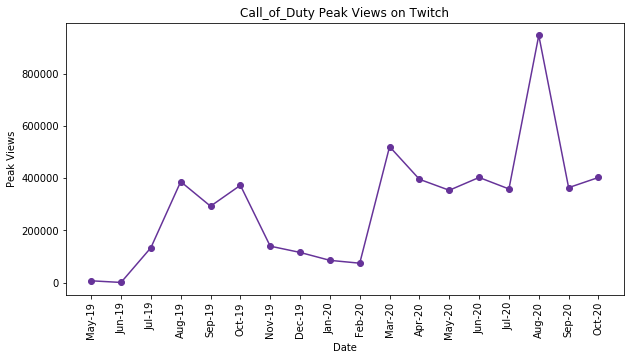

In [9]:
for num in numlist:
    datagraph('df_cod', 'Call_of_Duty', num)

#### Fortnite:

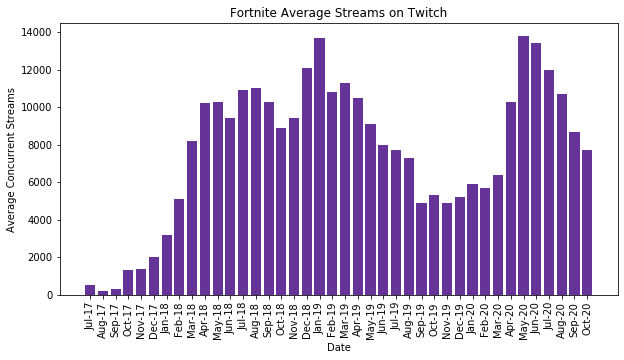

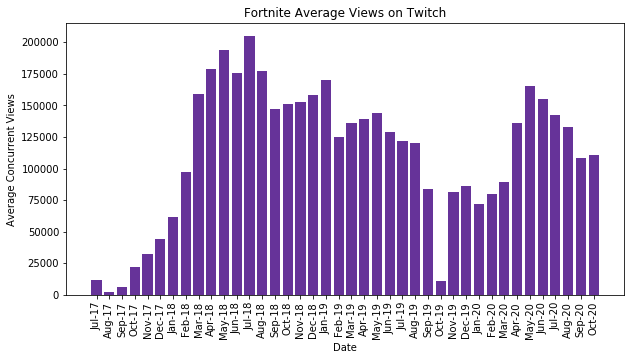

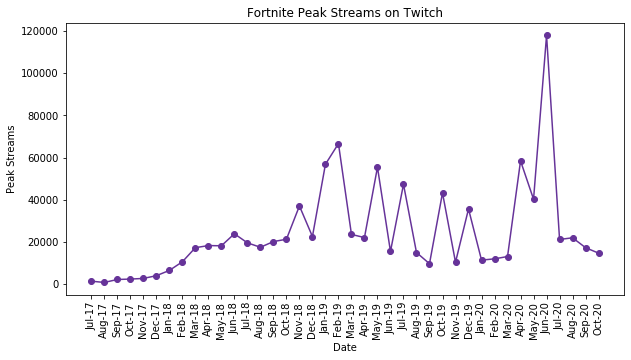

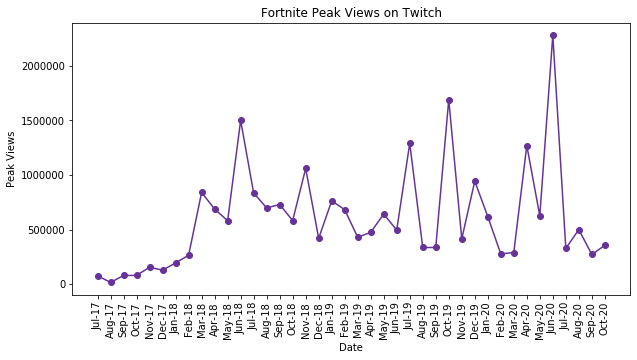

In [10]:
for num in numlist:
    datagraph('df_fortnite', 'Fortnite', num)

#### Counter Strike: Global Offensive:

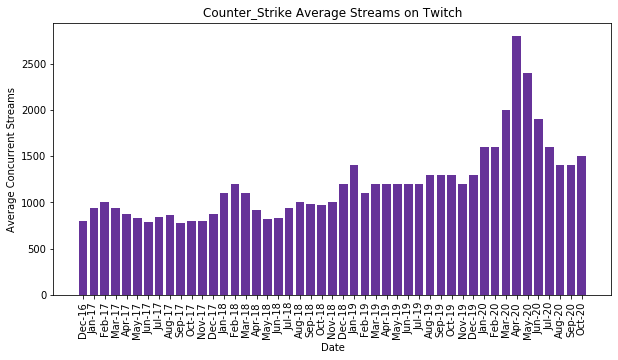

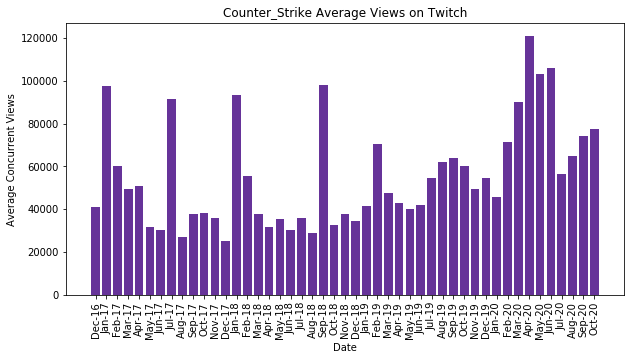

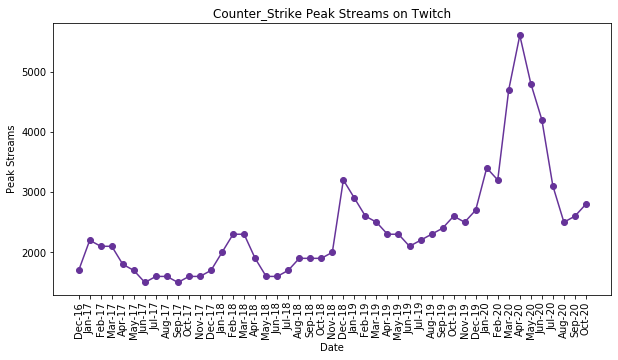

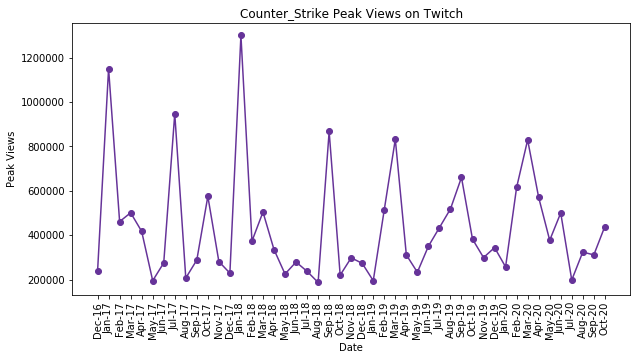

In [11]:
for num in numlist:
    datagraph('df_csgo', 'Counter_Strike', num)

### 6. Conclusions:

1. Fill something here
2. Fill something here
3. Fill something here